In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
import glob
import matplotlib.pyplot as plt
import tqdm
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
def runningmean(means,T):
    r=[]
    for i in range(T):
        r.append(np.nanmean(means[0:i+T+1]))

    for i in range(T,np.size(means)-T):
        r.append(np.nanmean(means[i-T:i+T+1]))

    for i in range(np.size(means)-T,np.size(means)+1):
        r.append(np.nanmean(means[i-T:]))

    return r

In [3]:
days = np.arange(0,183)
dates = [datetime.date(2019,10,1)+datetime.timedelta(days=np.int(days)) for days in days]

datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/'
folders = ['CS2_S3_GPOD/MERGE/','GPOD_Bristol/MERGE/']

CS2S3_CPOM = np.full(len(days),np.nan)
CS2S3_LARM = np.full(len(days),np.nan)
dics = [CS2S3_CPOM,CS2S3_LARM]

for folder, dic in zip (folders, dics):
    location = datapath + folder
    for day in tqdm.tqdm(days):
        date = dates[day].strftime('%Y%m%d')
        for f in os.listdir(location):
            if 'FB_interp' in f:
                if date in f:
                    dic[day] = np.nanmean(np.load(location+str(f)))
                else: 
                    pass

100%|████████████████████████████████████████| 183/183 [00:00<00:00, 773.38it/s]


In [4]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_dailymeans.csv',header=[0])
sats = [df['CS2_Bristol'],df['CS2_CPOM'],df['SM']]
satlabels = ['CS2_Bristol','CS2_CPOM','SM']

days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]

rm1 = 15
rm2 = 4

# 2010-2011
meansone={}
for sat,satlabel in zip(sats,satlabels):
    meansone[satlabel+'_dm'] = sat[273:455]
    meansone[satlabel+'_rm'] = runningmean(sat,T=rm1)[273:455]
    meansone[satlabel+'_ua'] = runningmean(np.asarray(sat[273:455]) - np.asarray(meansone[satlabel+'_rm']), T=0)
    meansone[satlabel+'_sa'] = runningmean(np.asarray(sat[273:455]) - np.asarray(meansone[satlabel+'_rm']), T=rm2)
    datesone = dates[273:455]
# 2011-2012
meanstwo={}
for sat,satlabel in zip(sats,satlabels):
    meanstwo[satlabel+'_dm'] = sat[638:821]
    meanstwo[satlabel+'_rm'] = runningmean(sat,T=rm1)[638:821]
    meanstwo[satlabel+'_ua'] = runningmean(np.asarray(sat[638:821]) - np.asarray(meanstwo[satlabel+'_rm']), T=0)
    meanstwo[satlabel+'_sa'] = runningmean(np.asarray(sat[638:821]) - np.asarray(meanstwo[satlabel+'_rm']), T=rm2)
    datestwo = dates[638:821]
# 2012-2013
meansthree={}
for sat,satlabel in zip(sats,satlabels):
    meansthree[satlabel+'_dm'] = sat[1004:1186]
    meansthree[satlabel+'_rm'] = runningmean(sat,T=rm1)[1004:1186]
    meansthree[satlabel+'_ua'] = runningmean(np.asarray(sat[1004:1186]) - np.asarray(meansthree[satlabel+'_rm']), T=0)
    meansthree[satlabel+'_sa'] = runningmean(np.asarray(sat[1004:1186]) - np.asarray(meansthree[satlabel+'_rm']), T=rm2)
    datesthree = dates[1004:1186]
# 2013-2014
meansfour={}
for sat,satlabel in zip(sats,satlabels):
    meansfour[satlabel+'_dm'] = sat[1369:1551]
    meansfour[satlabel+'_rm'] = runningmean(sat,T=rm1)[1369:1551]
    meansfour[satlabel+'_ua'] = runningmean(np.asarray(sat[1369:1551]) - np.asarray(meansfour[satlabel+'_rm']), T=0)
    meansfour[satlabel+'_sa'] = runningmean(np.asarray(sat[1369:1551]) - np.asarray(meansfour[satlabel+'_rm']), T=rm2)
    datesfour = dates[1369:1551]
# 2014-2015
meansfive={}
for sat,satlabel in zip(sats,satlabels):
    meansfive[satlabel+'_dm'] = sat[1734:1916]
    meansfive[satlabel+'_rm'] = runningmean(sat,T=rm1)[1734:1916]
    meansfive[satlabel+'_ua'] = runningmean(np.asarray(sat[1734:1916]) - np.asarray(meansfive[satlabel+'_rm']), T=0)
    meansfive[satlabel+'_sa'] = runningmean(np.asarray(sat[1734:1916]) - np.asarray(meansfive[satlabel+'_rm']), T=rm2)
    datesfive = dates[1734:1916]
# 2015-2016
meanssix={}
for sat,satlabel in zip(sats,satlabels):
    meanssix[satlabel+'_dm'] = sat[2099:2282]
    meanssix[satlabel+'_rm'] = runningmean(sat,T=rm1)[2099:2282]
    meanssix[satlabel+'_ua'] = runningmean(np.asarray(sat[2099:2282]) - np.asarray(meanssix[satlabel+'_rm']), T=0)
    meanssix[satlabel+'_sa'] = runningmean(np.asarray(sat[2099:2282]) - np.asarray(meanssix[satlabel+'_rm']), T=rm2)
    datessix = dates[2099:2282]
# 2016-2017
meansseven={}
for sat,satlabel in zip(sats,satlabels):
    meansseven[satlabel+'_dm'] = sat[2465:2647]
    meansseven[satlabel+'_rm'] = runningmean(sat,T=rm1)[2465:2647]
    meansseven[satlabel+'_ua'] = runningmean(np.asarray(sat[2465:2647]) - np.asarray(meansseven[satlabel+'_rm']), T=0)
    meansseven[satlabel+'_sa'] = runningmean(np.asarray(sat[2465:2647]) - np.asarray(meansseven[satlabel+'_rm']), T=rm2)
    datesseven = dates[2465:2647]
# 2017-2018
meanseight={}
for sat,satlabel in zip(sats,satlabels):
    meanseight[satlabel+'_dm'] = sat[2830:3012]
    meanseight[satlabel+'_rm'] = runningmean(sat,T=rm1)[2830:3012]
    meanseight[satlabel+'_ua'] = runningmean(np.asarray(sat[2830:3012]) - np.asarray(meanseight[satlabel+'_rm']), T=0)
    meanseight[satlabel+'_sa'] = runningmean(np.asarray(sat[2830:3012]) - np.asarray(meanseight[satlabel+'_rm']), T=rm2)
    dateseight = dates[2830:3012]
# 2018-2019
meansnine={}
for sat,satlabel in zip(sats,satlabels):
    meansnine[satlabel+'_dm'] = sat[3195:3377]
    meansnine[satlabel+'_rm'] = runningmean(sat,T=rm1)[3195:3377]
    meansnine[satlabel+'_ua'] = runningmean(np.asarray(sat[3195:3377]) - np.asarray(meansnine[satlabel+'_rm']), T=0)
    meansnine[satlabel+'_sa'] = runningmean(np.asarray(sat[3195:3377]) - np.asarray(meansnine[satlabel+'_rm']), T=rm2)
    datesnine = dates[3195:3377]
# 2019-2020
meansten={}
for sat,satlabel in zip(sats,satlabels):
    meansten[satlabel+'_dm'] = sat[3560:3743]
    meansten[satlabel+'_rm'] = runningmean(sat,T=rm1)[3560:3743]
    meansten[satlabel+'_ua'] = runningmean(np.asarray(sat[3560:3743]) - np.asarray(meansten[satlabel+'_rm']), T=0)
    meansten[satlabel+'_sa'] = runningmean(np.asarray(sat[3560:3743]) - np.asarray(meansten[satlabel+'_rm']), T=rm2)
    datesten = dates[3560:3743]

data = [meansone,meanstwo,meansthree,meansfour,meansfive,meanssix,meansseven,meanseight,meansnine,meansten]
seasons = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017',
           '2017-2018','2018-2019','2019-2020']
dates = [datesone,datestwo,datesthree,datesfour,datesfive,datessix,datesseven,dateseight,datesnine,datesten]

In [5]:
# daily timeseries

<Figure size 432x288 with 0 Axes>

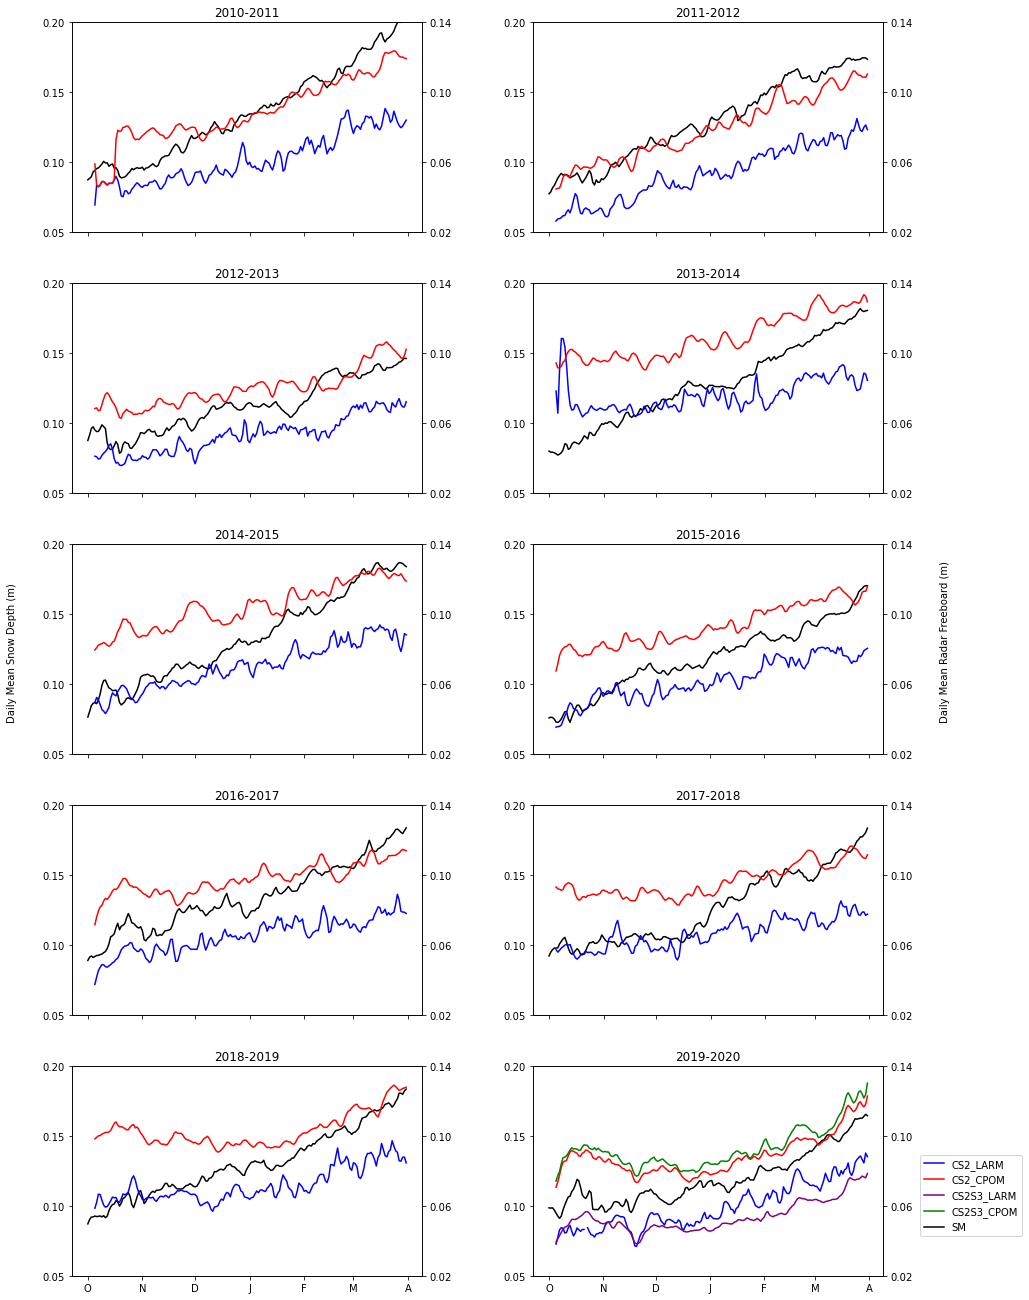

In [8]:
plt.figure()
fig, axs = plt.subplots(5,2,figsize=(12,18))
fig.tight_layout(w_pad=8,h_pad=3)

for counter, ax in enumerate(axs.reshape(-1)):
        ax.plot(dates[counter],data[counter]['SM_dm'],color='k')
        ax.set_ylim([0.05, 0.20])
        ax.set_yticks([0.05, 0.1, 0.15, 0.2])
        ax1b = ax.twinx()
        ax1b.plot(dates[counter],data[counter]['CS2_Bristol_dm'],label='CS2_LARM',color='blue')
        ax1b.plot(dates[counter],data[counter]['CS2_CPOM_dm'],label='CS2_CPOM',color='red')
        if counter == 9:
            ax1b.plot(dates[counter],CS2S3_LARM,label='CS2S3_LARM',color='purple')
            ax1b.plot(dates[counter],CS2S3_CPOM,label='CS2S3_CPOM',color='green')
        ax1b.set_ylim([0.02, 0.14])
        ax1b.plot([dates[counter][40]],[0],color='k',label='SM')

        ax1b.set_title(seasons[counter])
        ax1b.set_yticks([0.02, 0.06, 0.1, 0.14])
        if counter < 8:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(['O','N','D','J','F','M','A'])
ax1b.legend(bbox_to_anchor = (1.41, 0.6))

fig.text(1.05, 0.45, 'Daily Mean Radar Freeboard (m)', ha='center', rotation='vertical')
fig.text(-0.03, 0.45, 'Daily Mean Snow Depth (m)', ha='center', rotation='vertical')
#plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Snow Interpolated Freeboards/figures/retrack_daily_means.png',bbox_inches = "tight")

In [6]:
# 30-day running mean

Text(-0.03, 0.5, 'SnowModel Depth 30-day Running Mean (m)')

<Figure size 432x288 with 0 Axes>

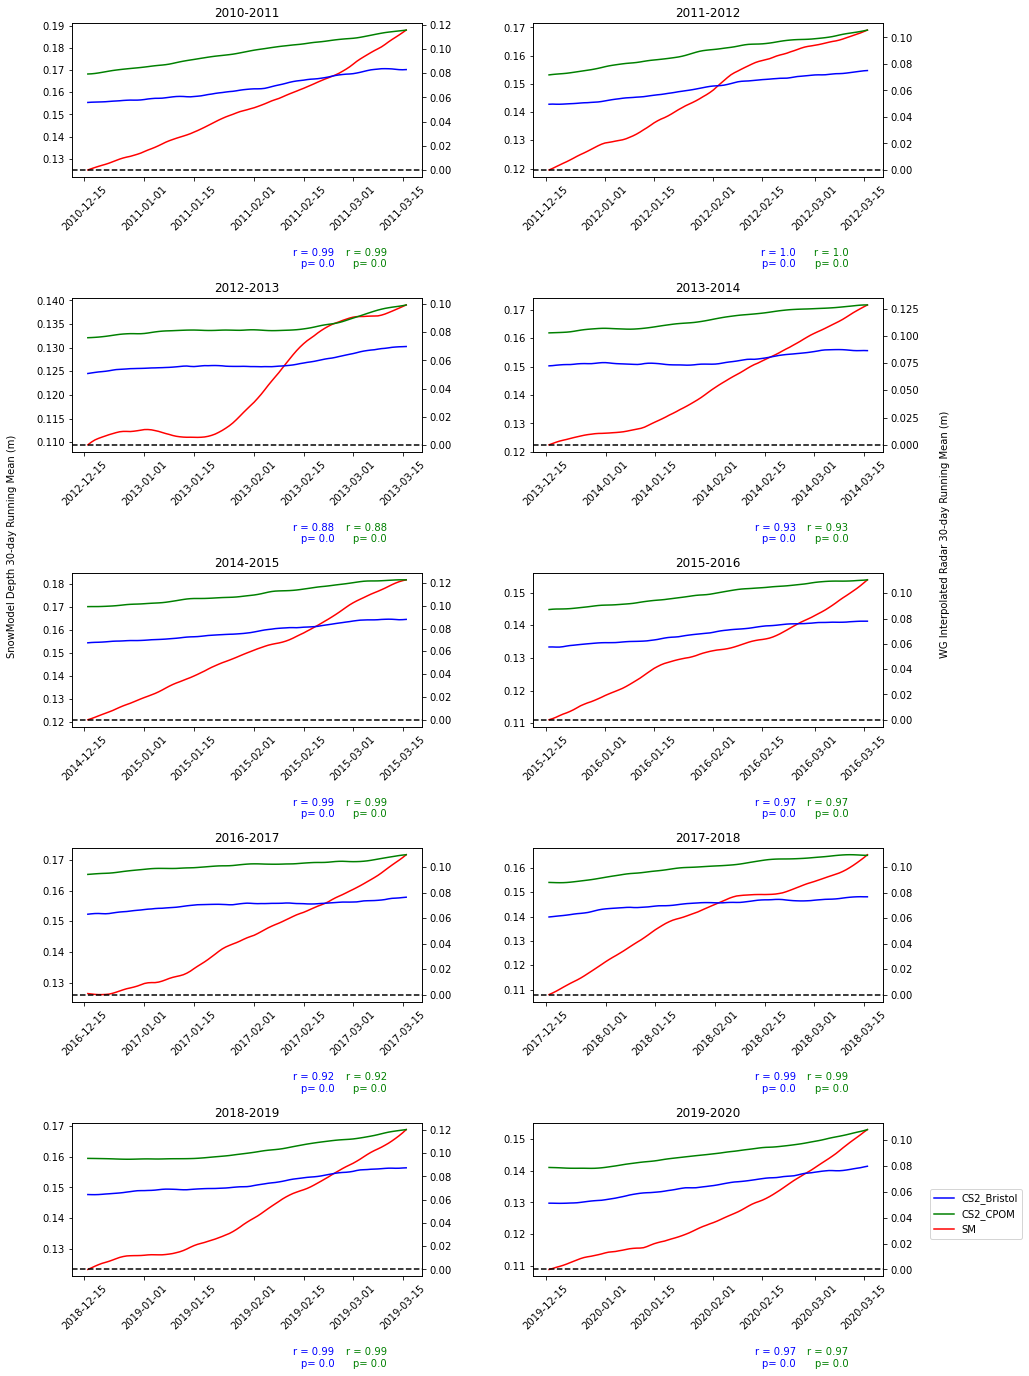

In [7]:
rm1 = 15
rm2 = 4

plt.figure()
fig, axs = plt.subplots(5,2,figsize=(12,18))
fig.tight_layout(w_pad=8,h_pad=10)

for counter, ax in enumerate(axs.reshape(-1)):
        ax.plot(dates[counter][(rm1):-(rm1)],data[counter]['SM_rm'][(rm1):-(rm1)],color='r')
        ax1b = ax.twinx()
        ax1b.plot(dates[counter][(rm1):-(rm1)],data[counter]['CS2_Bristol_rm'][(rm1):-(rm1)],label='CS2_Bristol',color='blue')
        ax1b.plot(dates[counter][(rm1):-(rm1)],data[counter]['CS2_CPOM_rm'][(rm1):-(rm1)],label='CS2_CPOM',color='green')
        ax1b.plot([dates[counter][40]],[0],color='r',label='SM')
        ax1b.axhline(0,color='k',ls='--')
        
        labels = [seasons[counter].split('-')[0]+'-12-15', seasons[counter].split('-')[1]+'-01-01',
                  seasons[counter].split('-')[1]+'-01-15', seasons[counter].split('-')[1]+'-02-01', 
                  seasons[counter].split('-')[1]+'-02-15', seasons[counter].split('-')[1]+'-03-01',
                  seasons[counter].split('-')[1]+'-03-15']
        ax1b.set_title(seasons[counter])
        ax.set_xticklabels(labels,rotation=45)
        
        fb = np.asarray(data[counter]['CS2_Bristol_rm'][(rm1):-(rm1)])
        snow = np.asarray(data[counter]['SM_rm'][(rm1):-(rm1)])
        mask = ~np.isnan(fb) & ~np.isnan(snow)
        rstats = pearsonr(fb[mask],snow[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        ax1b.annotate(f'r = {r}\np= {p}',xy=(0.75,-0.6),va='bottom',ha='right',xycoords='axes fraction',color='blue')
        fb = np.asarray(data[counter]['CS2_CPOM_rm'][(rm1):-(rm1)])
        snow = np.asarray(data[counter]['SM_rm'][(rm1):-(rm1)])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        ax1b.annotate(f'r = {r}\np= {p}',xy=(0.9,-0.6),va='bottom',ha='right',xycoords='axes fraction',color='green')
        
ax1b.legend(bbox_to_anchor = (1.41, 0.6))
fig.text(1.05, 0.5, 'WG Interpolated Radar 30-day Running Mean (m)', ha='center', rotation='vertical')
fig.text(-0.03, 0.5, 'SnowModel Depth 30-day Running Mean (m)', ha='center', rotation='vertical')

# unsmoothed anomalies

Text(-0.03, 0.5, 'SnowModel Depth Unsmoothed Anomaly (m)')

<Figure size 432x288 with 0 Axes>

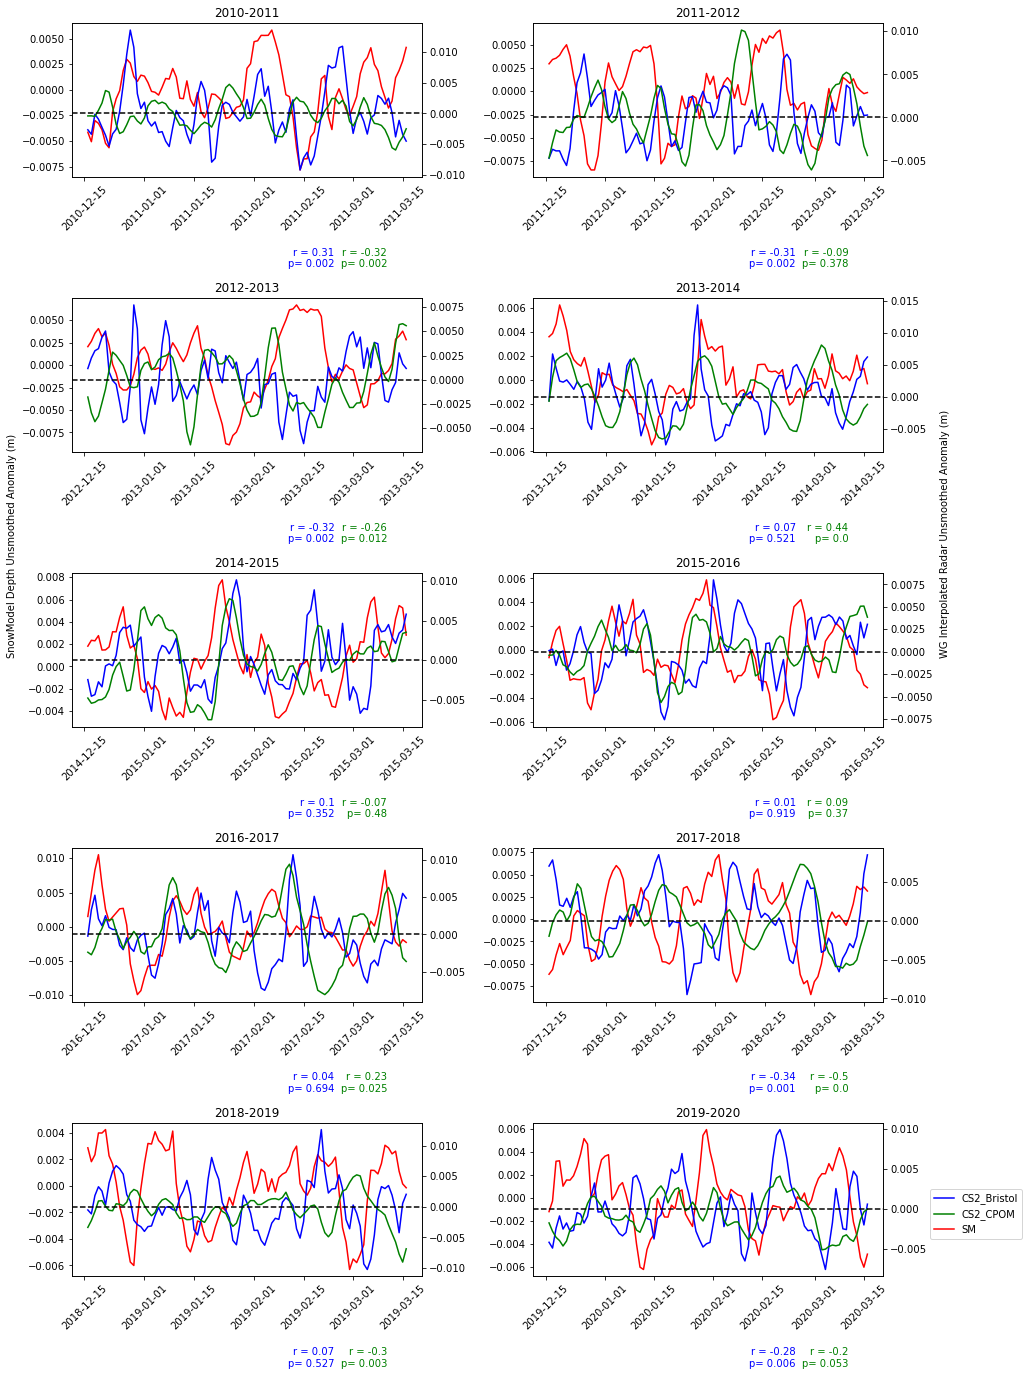

In [8]:
plt.figure()
fig, axs = plt.subplots(5,2,figsize=(12,18))
fig.tight_layout(w_pad=8,h_pad=10)

for counter, ax in enumerate(axs.reshape(-1)):
        ax.plot(dates[counter][(rm1):-(rm1)],data[counter]['SM_ua'][(rm1):-(rm1)][:-1],color='r')
        ax1b = ax.twinx()
        ax1b.plot(dates[counter][(rm1):-(rm1)],data[counter]['CS2_Bristol_ua'][(rm1):-(rm1)][:-1],label='CS2_Bristol',color='blue')
        ax1b.plot(dates[counter][(rm1):-(rm1)],data[counter]['CS2_CPOM_ua'][(rm1):-(rm1)][:-1],label='CS2_CPOM',color='green')
        ax1b.plot(dates[counter][40],[0],color='r',label='SM')
        ax1b.axhline(0,color='k',ls='--')
        
        labels = [seasons[counter].split('-')[0]+'-12-15', seasons[counter].split('-')[1]+'-01-01',
                  seasons[counter].split('-')[1]+'-01-15', seasons[counter].split('-')[1]+'-02-01', 
                  seasons[counter].split('-')[1]+'-02-15', seasons[counter].split('-')[1]+'-03-01',
                  seasons[counter].split('-')[1]+'-03-15']
        ax1b.set_title(seasons[counter])
        ax.set_xticklabels(labels,rotation=45)
        ax1b.set_title(seasons[counter])
        
        fb = np.asarray(data[counter]['CS2_Bristol_ua'][(rm1):-(rm1)])
        snow = np.asarray(data[counter]['SM_ua'][(rm1):-(rm1)])
        mask = ~np.isnan(fb) & ~np.isnan(snow)
        rstats = pearsonr(fb[mask],snow[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        ax1b.annotate(f'r = {r}\np= {p}',xy=(0.75,-0.6),va='bottom',ha='right',xycoords='axes fraction',color='blue')
        fb = np.asarray(data[counter]['CS2_CPOM_ua'][(rm1):-(rm1)])
        snow = np.asarray(data[counter]['SM_ua'][(rm1):-(rm1)])
        mask = ~np.isnan(fb) & ~np.isnan(snow)
        rstats = pearsonr(fb[mask],snow[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        ax1b.annotate(f'r = {r}\np= {p}',xy=(0.9,-0.6),va='bottom',ha='right',xycoords='axes fraction',color='green')
        
ax1b.legend(bbox_to_anchor = (1.41, 0.6))
fig.text(1.05, 0.5, 'WG Interpolated Radar Unsmoothed Anomaly (m)', ha='center', rotation='vertical')
fig.text(-0.03, 0.5, 'SnowModel Depth Unsmoothed Anomaly (m)', ha='center', rotation='vertical')

# smoothed anomalies

Text(-0.03, 0.5, 'SnowModel Depth Smoothed Anomaly (m)')

<Figure size 432x288 with 0 Axes>

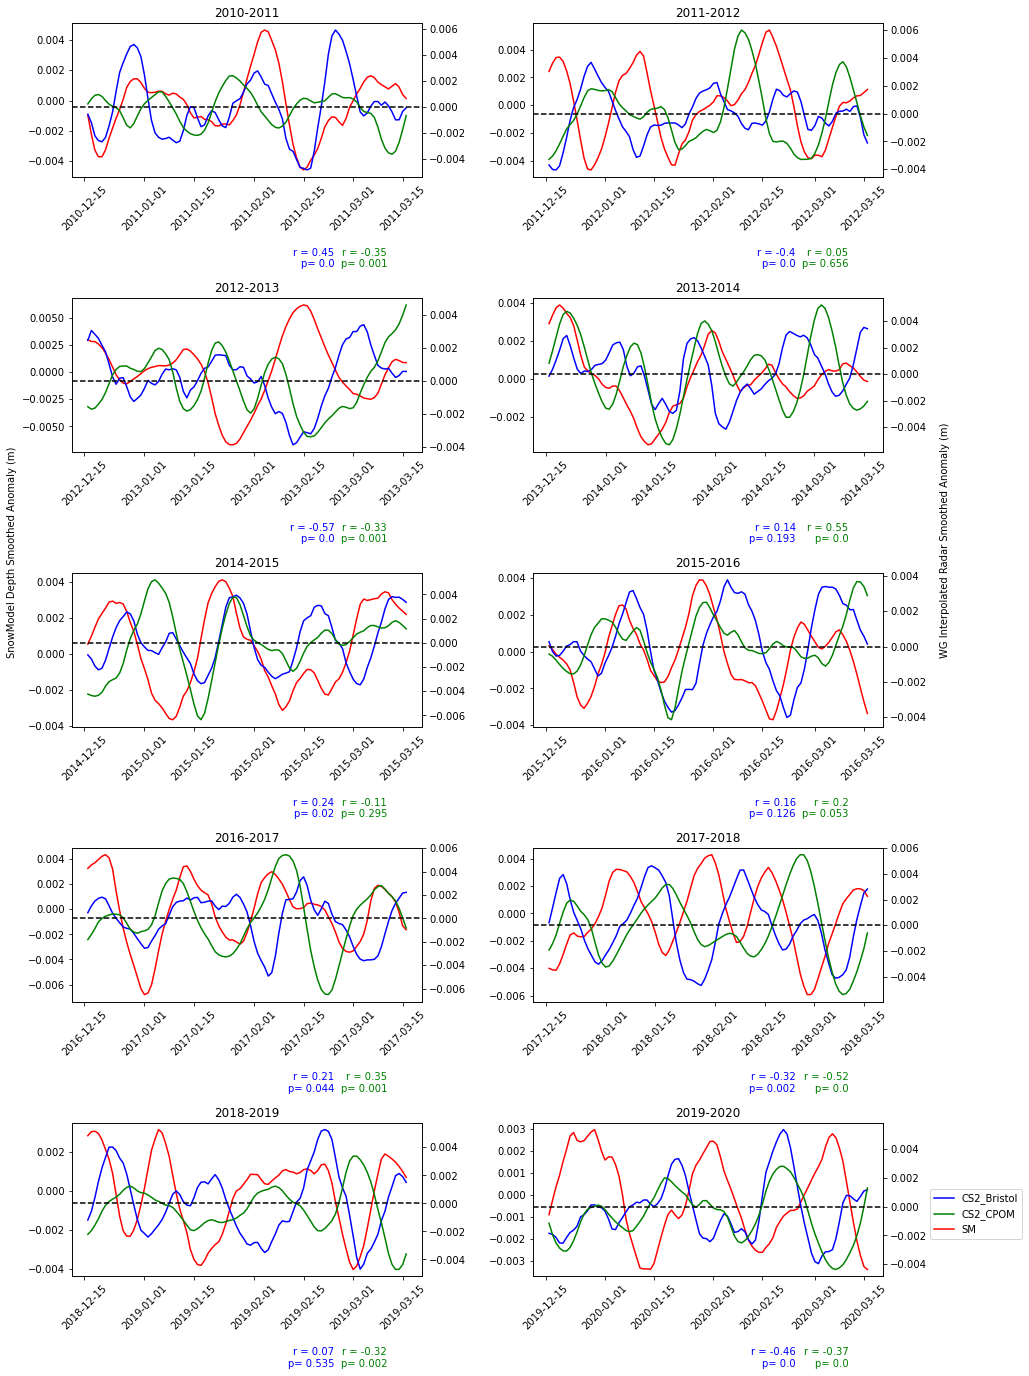

In [9]:
plt.figure()
fig, axs = plt.subplots(5,2,figsize=(12,18))
fig.tight_layout(w_pad=8,h_pad=10)

for counter, ax in enumerate(axs.reshape(-1)):
        ax.plot(dates[counter][(rm1):-(rm1)],data[counter]['SM_sa'][(rm1):-(rm1)][:-1],color='r')
        ax1b = ax.twinx()
        ax1b.plot(dates[counter][(rm1):-(rm1)],data[counter]['CS2_Bristol_sa'][(rm1):-(rm1)][:-1],label='CS2_Bristol',color='blue')
        ax1b.plot(dates[counter][(rm1):-(rm1)],data[counter]['CS2_CPOM_sa'][(rm1):-(rm1)][:-1],label='CS2_CPOM',color='green')
        ax1b.plot(dates[counter][40],[0],color='r',label='SM')
        ax1b.axhline(0,color='k',ls='--')
        
        labels = [seasons[counter].split('-')[0]+'-12-15', seasons[counter].split('-')[1]+'-01-01',
                  seasons[counter].split('-')[1]+'-01-15', seasons[counter].split('-')[1]+'-02-01', 
                  seasons[counter].split('-')[1]+'-02-15', seasons[counter].split('-')[1]+'-03-01',
                  seasons[counter].split('-')[1]+'-03-15']
        ax1b.set_title(seasons[counter])
        ax.set_xticklabels(labels,rotation=45)
        ax1b.set_title(seasons[counter])
        
        fb = np.asarray(data[counter]['CS2_Bristol_sa'][(rm1):-(rm1)])
        snow = np.asarray(data[counter]['SM_sa'][(rm1):-(rm1)])
        mask = ~np.isnan(fb) & ~np.isnan(snow)
        rstats = pearsonr(fb[mask],snow[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        ax1b.annotate(f'r = {r}\np= {p}',xy=(0.75,-0.6),va='bottom',ha='right',xycoords='axes fraction',color='blue')
        fb = np.asarray(data[counter]['CS2_CPOM_sa'][(rm1):-(rm1)])
        snow = np.asarray(data[counter]['SM_sa'][(rm1):-(rm1)])
        mask = ~np.isnan(fb) & ~np.isnan(snow)
        rstats = pearsonr(fb[mask],snow[mask])
        r = np.round(rstats[0],decimals=2)
        p = np.round(rstats[1],decimals=3)
        ax1b.annotate(f'r = {r}\np= {p}',xy=(0.9,-0.6),va='bottom',ha='right',xycoords='axes fraction',color='green')
        
ax1b.legend(bbox_to_anchor = (1.41, 0.6))
fig.text(1.05, 0.5, 'WG Interpolated Radar Smoothed Anomaly (m)', ha='center', rotation='vertical')
fig.text(-0.03, 0.5, 'SnowModel Depth Smoothed Anomaly (m)', ha='center', rotation='vertical')
#plt.savefig('/Users/carmennab/PhD/OI_PolarSnow/figs/fig1.pdf',bbox_inches = "tight")